In [1]:
import findspark
findspark.init()
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.context import SparkContext
from pyspark import SparkConf
import numpy as np
import pandas
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [2]:
#initialize spark session
spark = SparkSession \
    .builder \
    .appName("Phone Book - Country Look up") \
    .config("spark.some.config.option", "some-value") \
    .config("spark.sql.caseSensitive", "false")\
    .getOrCreate()
spark.conf.set('spark.sql.caseSensitive', False)


In [3]:
#Create a cleanup function to remove the special characters
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [4]:
#read the data
df = pandas.read_csv('Reviews.csv')
cluster = df.groupby("Score")["Summary"].apply(list)
cluster = pandas.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pandas.read_csv("cluster.csv")
#Cleanup the Summary column
cluster1["Summary_Clean"] = cluster1["Summary"].apply(cleanup)

In [5]:
stopwords = set(STOPWORDS)
#Function for creating the wordcloud
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
  
    plt.imshow(wordcloud)
    plt.show()
    

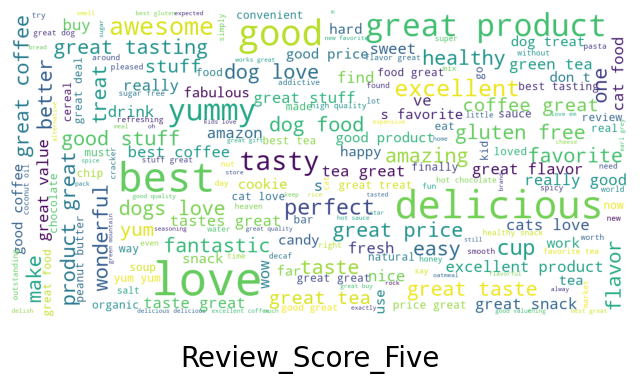

In [6]:
#Generate the wordcloud for the Reviews with Score 5
show_wordcloud(cluster1["Summary_Clean"][4], title = "Review_Score_Five")

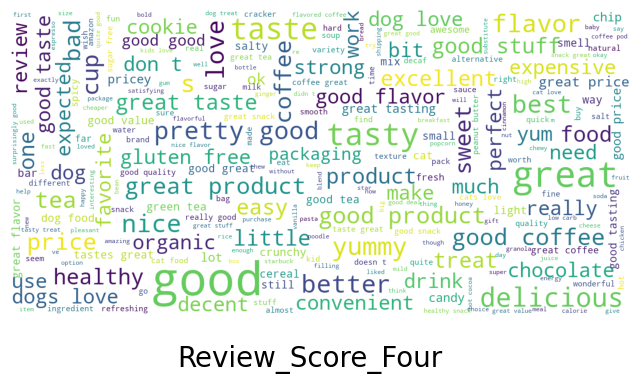

In [7]:
#Generate the wordcloud for the Reviews with Score 4
show_wordcloud(cluster1["Summary_Clean"][3], title = "Review_Score_Four")

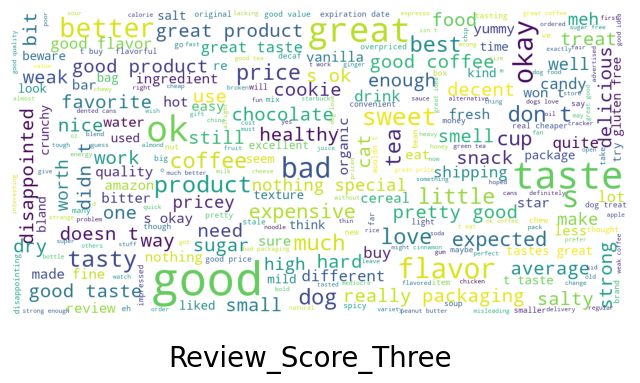

In [8]:
#Generate the wordcloud for the Reviews with Score 3
show_wordcloud(cluster1["Summary_Clean"][2], title = "Review_Score_Three")

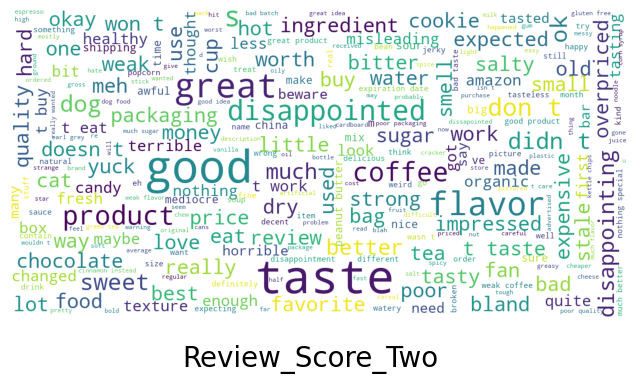

In [9]:
#Generate the wordcloud for the Reviews with Score 2
show_wordcloud(cluster1["Summary_Clean"][1], title = "Review_Score_Two") 

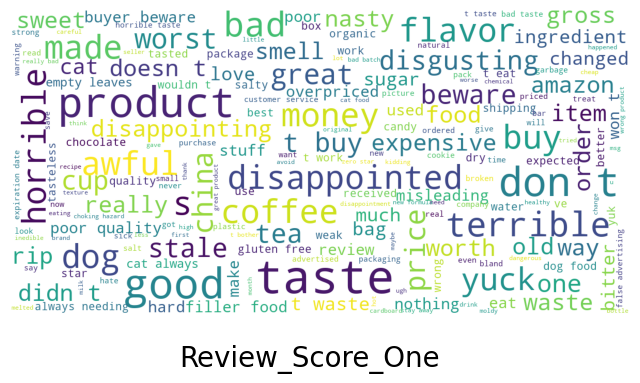

In [10]:
#Generate the wordcloud for the Reviews with Score 1
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review_Score_One") 